In this homework, you will write a python implementation of logistic regression. You will test it on a synthetic dataset.
First we import some libraries that we need.

# New Section

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

We define each of the following functions needed. Note that all functions should take **a vector input** (i.e. t is an 1-d array). **Study the results of Problem 2 and use the formulations that avoid overflows**.  
1. sigmoid function sigmoid(t)
2. log of sigmoid(t), called log_sig(t)
3. log of 1-sigmoid, log(1-sigmoid(t)), called log_one_sig(t). Note that there are two formulations of sigmoid(t) resulting two formulations of log(1-sigmoid(t)), i.e. log(1-sigmoid(t)) = -log(1+e^t) = -t-log(1+e^(-t)). As in Problem 2, use a proper formula according to whether t > 0 or not.
4. cross-entropy loss function given the inputs of label y and prediction y_hat = sigmoid(z), where y, y_hat, and z are vectors of dimension N. (N = # of data points.) You should implement this function with z, rather than y_hat, as the input; namely, the loss function should be

    loss = -y log(sigmoid(z)) - (1-y) log (1-sigmoid(z))

  where log(sigmoid(z)) and log (1-sigmoid(z)) should be computed by the functions log_sig(z) and log_one_sig(z) in parts 2 and 3.

In [2]:
def sigmoid(t):
    return 1.0/(1 + np.exp(-t))

def log_sig(t):
    # compute log(sigmoid(t)) to be used in loss

    y = 0*t
    m=t.shape[0]
    for i in range(m):
      if t[i] < 0:
        y[i] = t[i]-np.log(1+np.exp(t[i]))
      else:
        y[i] = -np.log(1+np.exp(-t[i]))

    return y

def log_one_sig(t):
    # compute log(1-sigmoid(t)) to be used in loss

    y = 0*t
    m=t.shape[0]
    for i in range(m):
      if t[i] < 0:
        y[i] = -np.log(1+np.exp(t[i]))
      else:
        y[i] = -t[i]- np.log(1+np.exp(-t[i]))

    return y

def loss(y, z):
    # compute loss(y, sigmoid(z))
    # y --> label
    # z --> model output

    loss = np.mean(-y*(log_sig(z)) - (1-y)*log_one_sig(z))
    return loss



Define the model output, z=w^T x + b, given the data input X (n-byN matrix) and the model parameters w (n-dimensional weigth vector) and b (bias)

In [3]:
def model(w,b,X):

    # X --> Input.
    # z --> model output.
    # w --> weight.
    # b --> bias.

    z = np.dot(X, w) + b

    return z

Define the function that computes the gradient of the cross-entropy loss given the label y (N-vector), the model prediction y_hat (N-vector), and the dataset X (n-by-N matrix).

In [4]:
def gradients(X, y, y_hat):

    # X --> Input.
    # y --> Label.
    # y_hat --> model prediction sigmoid(z)
    # w --> weight.
    # b --> bias.

    # N -> number of training examples.
    N = X.shape[0]

    # Gradient of loss w.r.t weight.
    dw = (1/N)*np.dot(X.T, (y_hat - y))

    # Gradient of loss w.r.t bias.
    db = (1/N)*np.sum((y_hat - y))

    return dw, db

Write the function that minimizes the loss (i.e. training) by the gradient descent algorithm using a fixed number of iteration (*iter*) and learning rate (*lr*). Your function should take *iter* and *lr* as well as the initial weight w, initial bias b, the input data X and the label y as the inputs. It produces new w and b as output. Also compute the loss value at each iteration and out the sequence of the loss.

In [5]:
def train(w, b, X, y, iter, lr):

    # X --> Input.
    # y --> label.
    # w --> initial weight on input and the trained weight on output
    # b --> initial bias on input and the trained bias on output
    # lr --> learning rate

    # N-> number of training examples
    # n-> number of features
    N, n = X.shape

    # Reshaping y.
    y = y.reshape(N,1)

    z = model(w,b,X)
    y_hat = sigmoid(z)
    # Empty list to store losses.
    losses = []

    # Training loop.
    for i in range(iter):

        # Getting the gradients of loss w.r.t parameters.
        dw, db = gradients(X, y, y_hat)

        # Updating the parameters.
        w -= lr*dw
        b -= lr*db

        # Calculating y_hat, loss and appending it in the list.
        # y_hat is used in the next iteration
        z = model(w,b,X)
        y_hat = sigmoid(z)
        l = loss(y,z)
        losses.append(l)
        print('Iteration ', i+1, 'accuracy = ', accuracy(np.squeeze(y),  predict(z)), 'loss = ', l)

    # returning weights, bias and losses(List).
    return w, b, losses



1. Write the function that uses a train model to produce class prediction (o or 1) for an input dataset X, i.e. turn the model output model(w,b,X) into predicted label y_label (N-vector of 0 or 1).
2. For an input dataset X with a known label y (e.g. a training or testing dataset) and a predicted label y_label, compute the accuracy of prediction (i.e. # correct predictions/N)

In [6]:
def predict(output):

    # output --> model output z
    # pred_class --> model class prediction

    N = output.shape[0]
    pred_class = np.ones(N)
    # if z > 0 --> 1
    # if z <= 0 --> 0
    for i in range(N):
        if output[i] > 0:
          pred_class[i] = 1
        else:
          pred_class[i] = 0

    return pred_class

def accuracy(y, y_predict):
    accuracy = np.sum(y == y_predict) / len(y)
    return accuracy

We are ready to test your programs on some datasets. First, we use a synthetic dataset generated using [scikit-learn](https://scikit-learn.org/stable/datasets.html) package. We generate a dataset for training and simultaneously a dataset for testing.

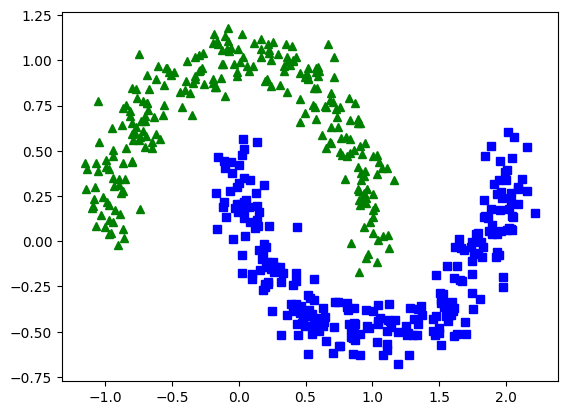

In [7]:
from sklearn.datasets import make_moons
X_train, y_train = make_moons(n_samples=500, noise=0.1)
X_test, y_test = make_moons(n_samples=1000, noise=0.1)

plt.figure()
plt.plot(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], "g^")
plt.plot(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], "bs")



We now train the model using (X_train, y_train). We initialize weight as a random vector, and b=0. We plot the loss convergence history. You should get the loss down to about 0.2.
We compute the prediction accuracy on (X_train, y_train). You should get an accuracy in the 80s.

Iteration  1 accuracy =  0.616 loss =  0.7155542357660484
Iteration  2 accuracy =  0.612 loss =  0.7077695756437663
Iteration  3 accuracy =  0.614 loss =  0.7001981393955301
Iteration  4 accuracy =  0.614 loss =  0.6928338776276813
Iteration  5 accuracy =  0.616 loss =  0.6856708175648646
Iteration  6 accuracy =  0.62 loss =  0.6787030732045993
Iteration  7 accuracy =  0.62 loss =  0.671924854282268
Iteration  8 accuracy =  0.63 loss =  0.6653304740961465
Iteration  9 accuracy =  0.626 loss =  0.6589143562477882
Iteration  10 accuracy =  0.624 loss =  0.6526710403573563
Iteration  11 accuracy =  0.618 loss =  0.6465951868164828
Iteration  12 accuracy =  0.618 loss =  0.6406815806430577
Iteration  13 accuracy =  0.614 loss =  0.6349251345031665
Iteration  14 accuracy =  0.618 loss =  0.6293208909652958
Iteration  15 accuracy =  0.622 loss =  0.6238640240510963
Iteration  16 accuracy =  0.618 loss =  0.6185498401454934
Iteration  17 accuracy =  0.618 loss =  0.6133737783269484
Iteration 

0.842

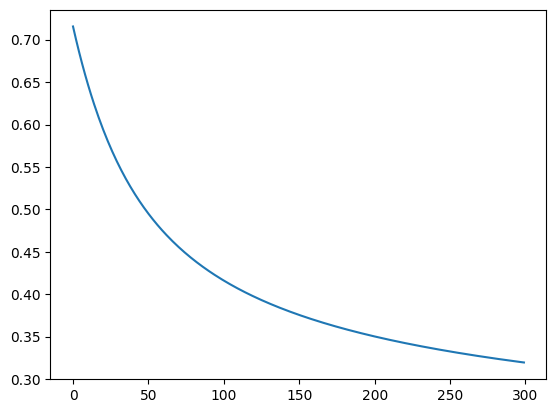

In [8]:
w = np.random.rand(X_train.shape[1],1)
b = 0
#print(X_train)
w, b, loss = train(w, b, X_train, y_train, iter=300, lr=0.1)
plt.figure()
plt.plot(loss)
print(len(X_train))
#training accuracy
y_hat = model(w,b,X_train)
accuracy(np.squeeze(y_train), predict(y_hat))

To see how well our model performs, we compute its accuracy on the testing dataset (X_test, y_test).

In [9]:
y_hat = model(w,b,X_test)
y_test=np.squeeze(y_test)
accuracy(y_test, predict(y_hat))

0.835

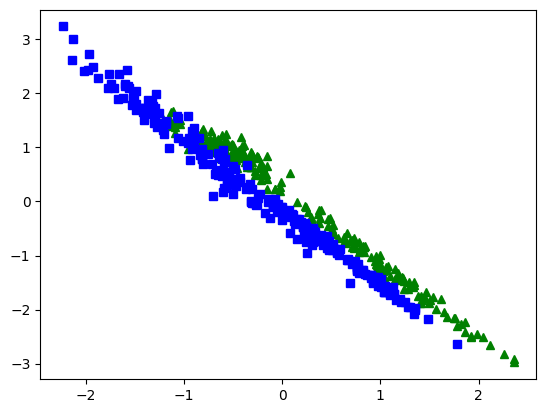

In [10]:
from sklearn.datasets import make_classification
X_train, y_train = make_classification(n_samples=1000, n_features=4)
X_test=X_train[500:,]
y_test=y_train[500:,]
X_train=X_train[:500,]
y_train=y_train[:500,]

plt.figure()
plt.plot(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], "g^")
plt.plot(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], "bs")